Importing necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Loading dataset

In [2]:
df = pd.read_excel('default of credit card clients.xls', header=1)

# Data description + Exploratory Data Analysis (EDA)

This dataset has 24 features and 30 000 observations.

INDEPENDENT VARIABLES:
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, …  8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

TARGET VARIABLE:
- default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df.rename(columns={'default payment next month' : 'default_payment'}, inplace = True)

In [8]:
df.drop(columns='ID', axis = 1, inplace= True)

As we see in the notes, education values {0, 5, 6} stand for the same category ,,unknown", so we will sum it up to one

In [9]:
df.loc[(df['EDUCATION'] == 0) | (df['EDUCATION'] == 6), 'EDUCATION'] = 5

For further EDA purpose we will replace the values of education, sex and marriage with their original values.

We will also create the 10 years groups for the age feature.

In [10]:
education_mapping = {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others', 5: 'unknown'}
sex_mapping = {1: 'male', 2: 'female'}
marriage_mapping = {0: 'unknown', 1: 'married', 2: 'single', 3: 'others'}

In [11]:
cut_list = [20,30,40,50,60,70,80]
group_names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_GROUPS'] = pd.cut(x = df['AGE'], bins= cut_list, labels=group_names)

In [12]:
df['EDUCATION_GROUPS'] = df['EDUCATION'].replace(education_mapping)
df['SEX_GROUPS'] = df['SEX'].replace(sex_mapping)
df['MARRIAGE_GROUPS'] = df['MARRIAGE'].replace(marriage_mapping)

In [13]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_GROUPS,EDUCATION_GROUPS,SEX_GROUPS,MARRIAGE_GROUPS
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,21-30,university,female,married
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,21-30,university,female,single
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,31-40,university,female,single
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,31-40,university,female,married
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,51-60,university,male,married


In [14]:
characteristics = ['AGE_GROUPS', 'SEX_GROUPS', 'EDUCATION_GROUPS', 'MARRIAGE_GROUPS']

In [15]:
PAY_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
BILL_AMT_features =  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PAY_AMT_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

The following graphs illustrate what the distribution of observations between each group looks like, and what the percentage share of defaults in the groups looks like

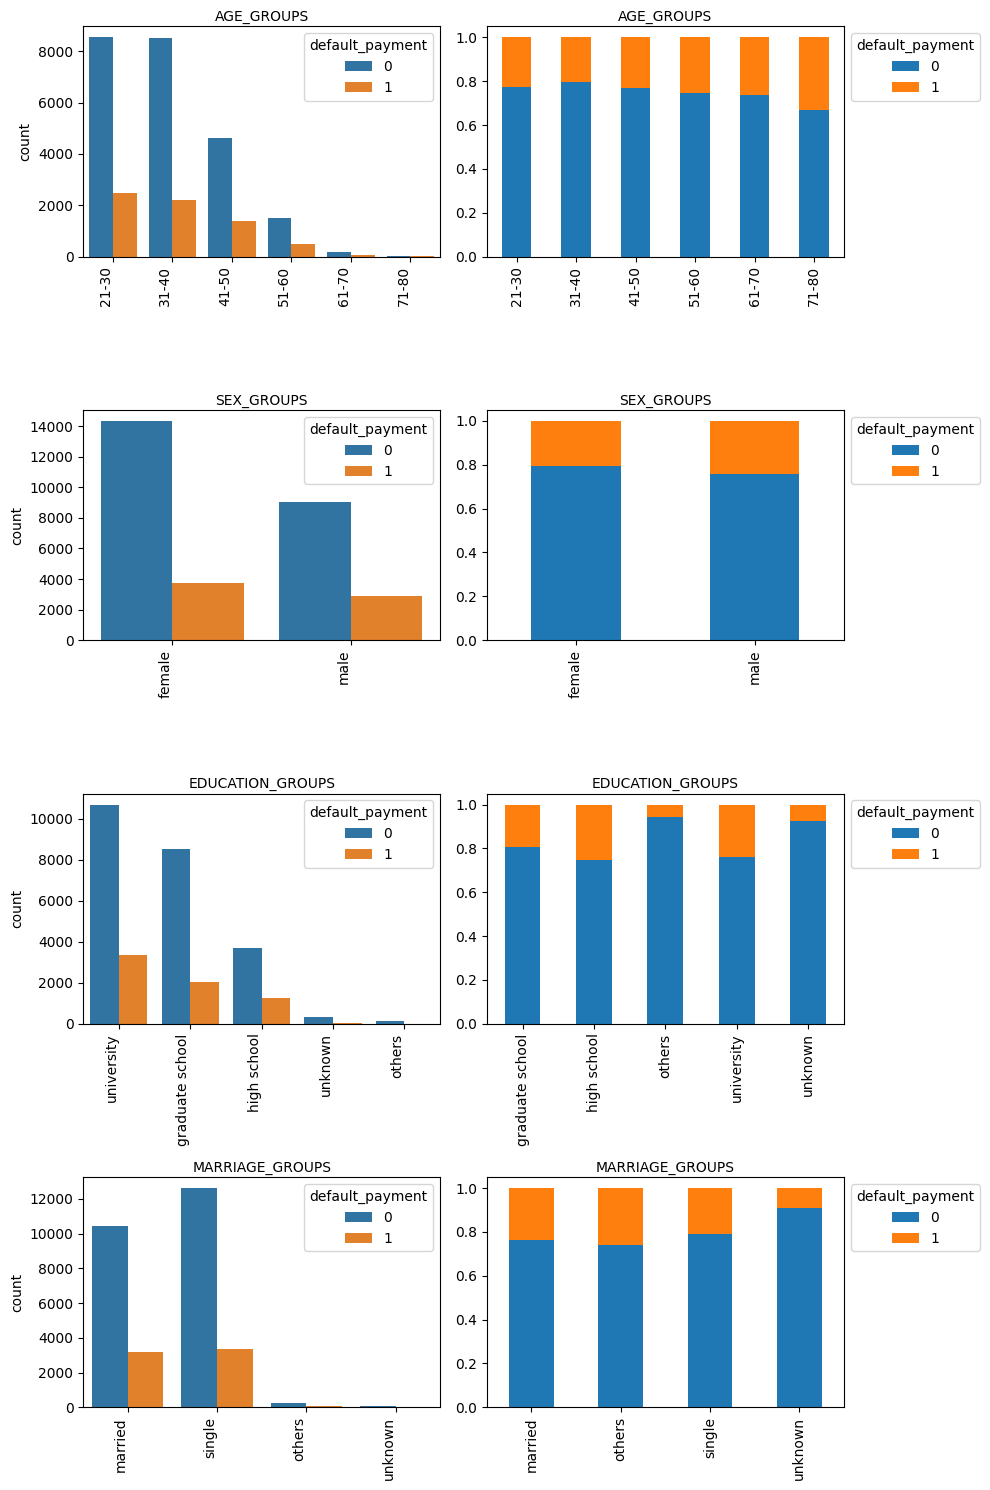

In [16]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

axs = axs.flatten()

for i, feature in enumerate(characteristics):
    sns.countplot(x=feature, hue='default_payment', data=df, ax=axs[i * 2])
    axs[i * 2].set_xticklabels(axs[i * 2].get_xticklabels(), rotation=90, horizontalalignment='right')
    axs[i * 2].set_xlabel(feature)
    axs[i * 2].xaxis.set_label_position('top')
    
    counts = df.groupby([feature, 'default_payment']).size().unstack()
    proportions = counts.div(counts.sum(axis=1), axis=0)
    
    ax = proportions.plot(kind='bar', stacked=True, ax=axs[i * 2 + 1])
    ax.set_xlabel(feature)
    axs[i * 2 + 1].xaxis.set_label_position('top')
    
    ax.legend(title='default_payment', bbox_to_anchor=(1, 1), loc='upper left')

fig.tight_layout()
plt.show()

The following graphs show the distribution of churn in the groups in terms of repayment status for each month.

- As expected, the percentage of defaults increases with the number of late payments

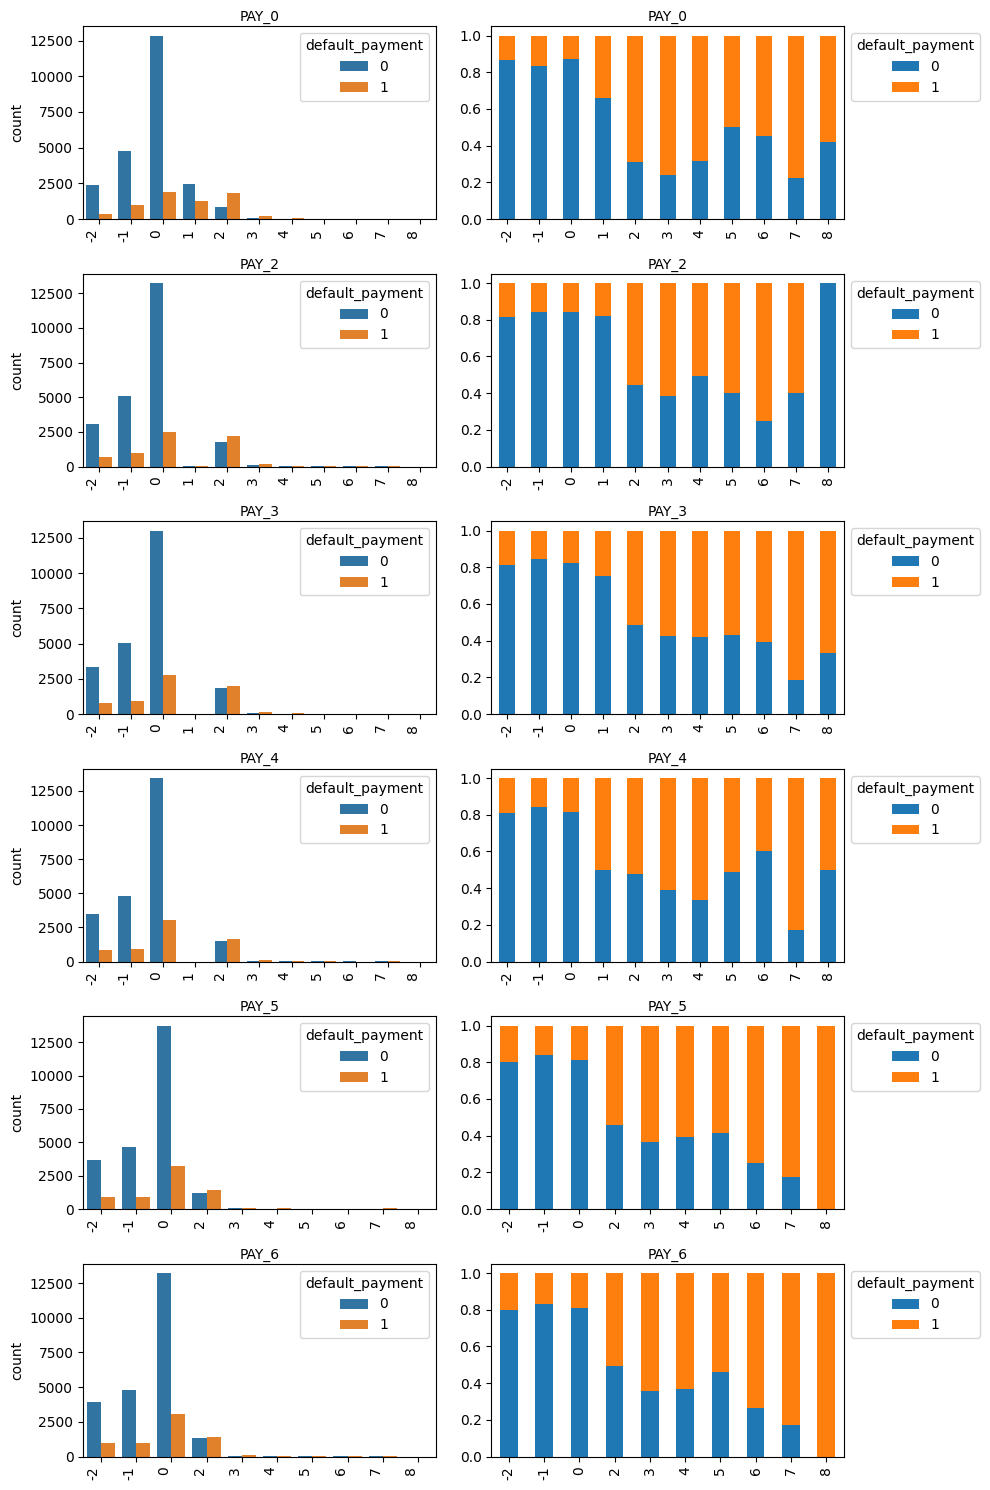

In [17]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(10, 15))

axs = axs.flatten()

for i, feature in enumerate(PAY_features):
    sns.countplot(x=feature, hue='default_payment', data=df, ax=axs[i * 2])
    axs[i * 2].set_xticklabels(axs[i * 2].get_xticklabels(), rotation=90, horizontalalignment='right')
    axs[i * 2].set_xlabel(feature)
    axs[i * 2].xaxis.set_label_position('top')
    
    counts = df.groupby([feature, 'default_payment']).size().unstack()
    proportions = counts.div(counts.sum(axis=1), axis=0)
    
    ax = proportions.plot(kind='bar', stacked=True, ax=axs[i * 2 + 1])
    ax.set_xlabel(feature)
    axs[i * 2 + 1].xaxis.set_label_position('top')
    
    ax.legend(title='default_payment', bbox_to_anchor=(1, 1), loc='upper left')

fig.tight_layout()
plt.show()

The boxplots below illustrate the distributions of the PAY_AMT, BILL_AMT features.

- As we can see, there are many outliers in our set , however, removing them can significantly affect our model, since our set is not large.

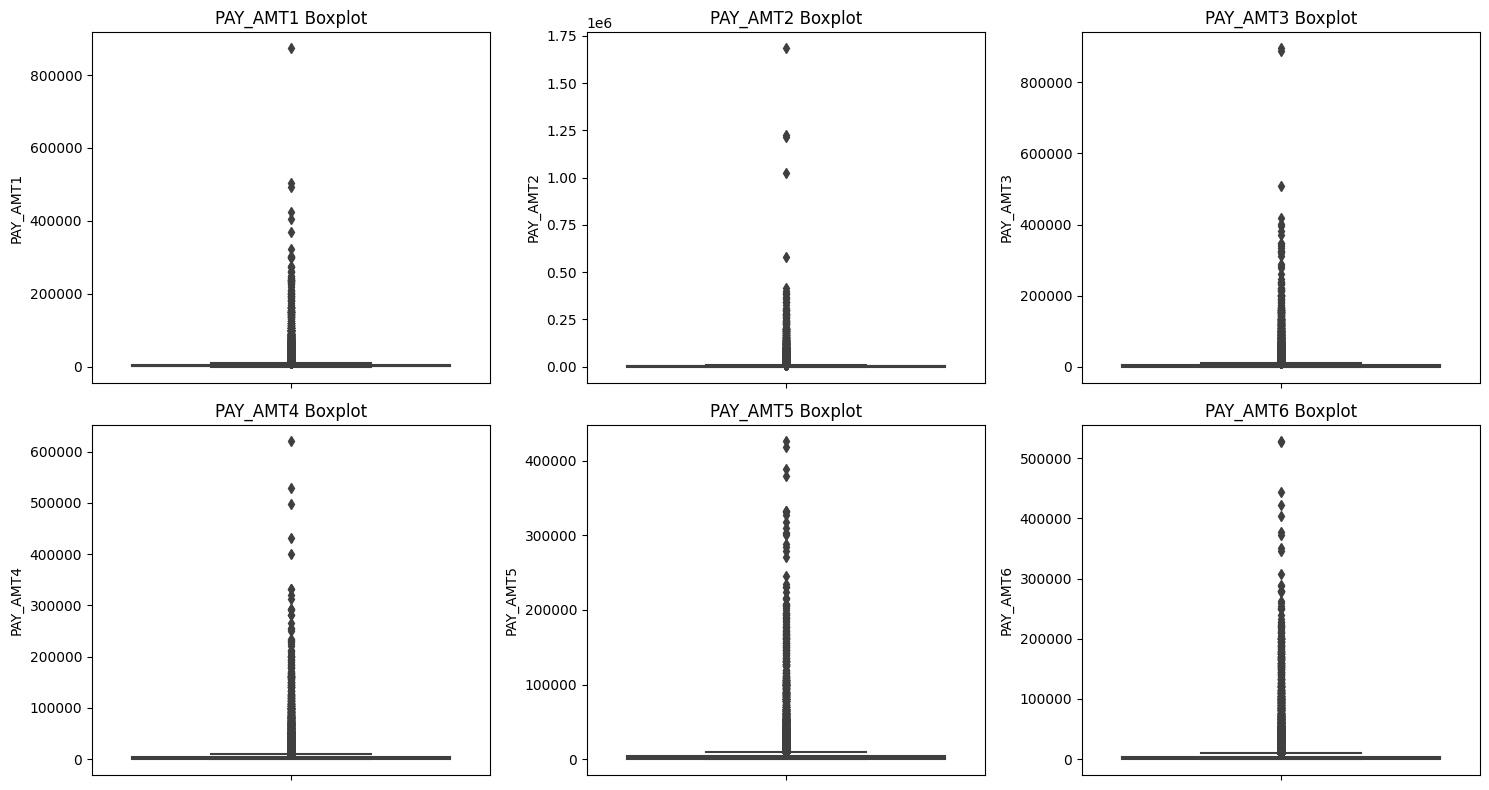

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

for i, feature in enumerate(PAY_AMT_features):
    row = i // 3 
    col = i % 3 
    sns.boxplot(y=feature, data=df, ax=axs[row, col])
    axs[row, col].set_title(f'{feature} Boxplot')
    
fig.tight_layout()

plt.show()

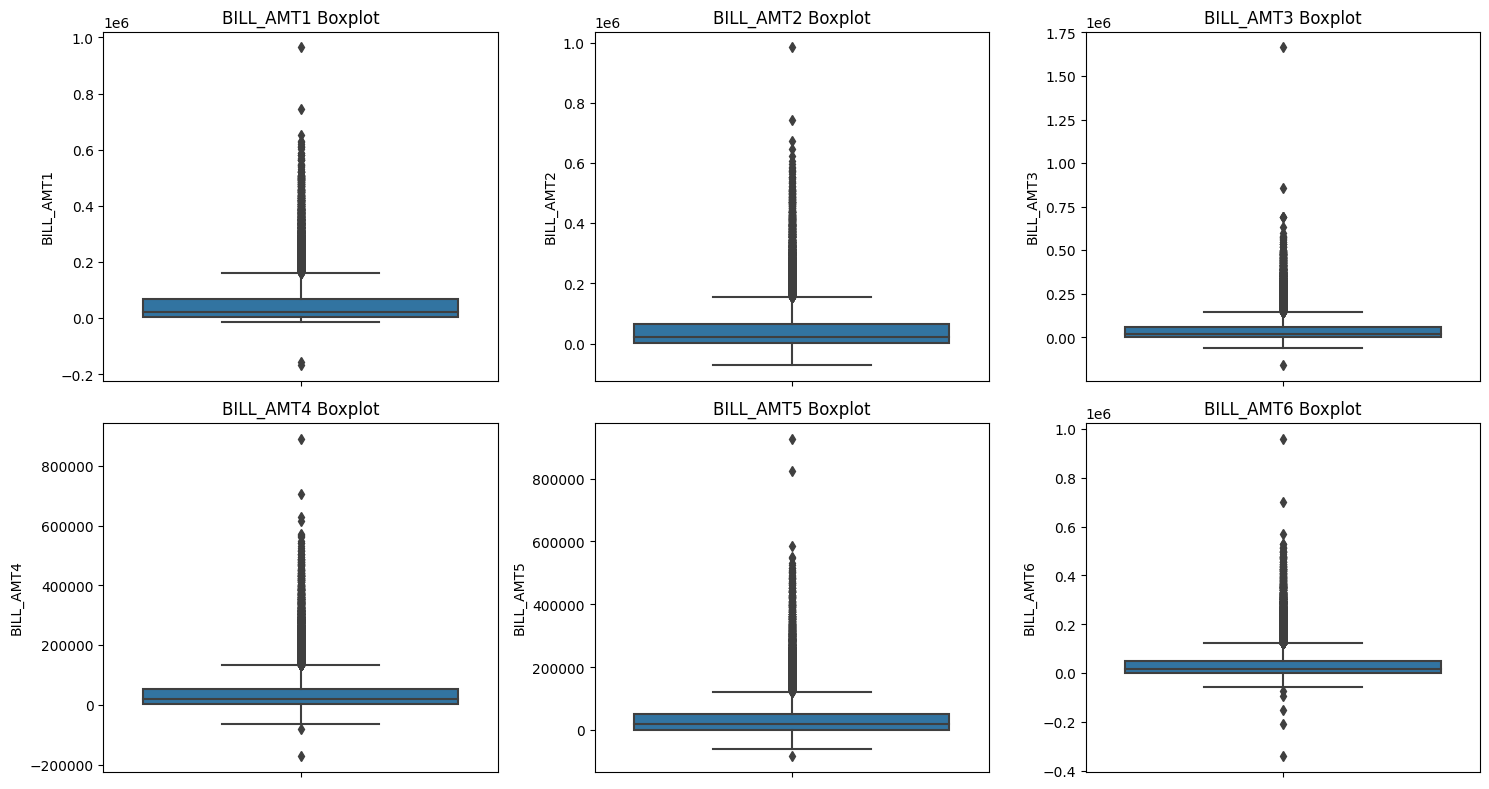

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

for i, feature in enumerate(BILL_AMT_features):
    row = i // 3 
    col = i % 3 
    sns.boxplot(y=feature, data=df, ax=axs[row, col])
    axs[row, col].set_title(f'{feature} Boxplot')
    
fig.tight_layout()

plt.show()

# Feature engineering and feature selection

Since our categorical variables have low number of values and no natural hierarchy I decided to use one hot encoding

In [20]:
age_groups_encoded = pd.get_dummies(df['AGE_GROUPS'], prefix= 'AGE_GROUP', drop_first=True, dtype= 'int64')
sex_encoded = pd.get_dummies(df['SEX_GROUPS'], prefix= 'SEX', drop_first=True, dtype= 'int64')
marriage_encoded = pd.get_dummies(df['MARRIAGE_GROUPS'], prefix= 'MARRIAGE_STATUS' ,drop_first=True, dtype= 'int64')
education_encoded = pd.get_dummies(df['EDUCATION_GROUPS'], prefix= 'EDUCATION',drop_first=True, dtype= 'int64')

In [21]:
df = pd.concat([df, age_groups_encoded, sex_encoded, marriage_encoded, education_encoded], axis=1)

df = df.drop(['AGE', 'SEX', 'MARRIAGE', 'EDUCATION', 'AGE_GROUPS', 'SEX_GROUPS', 'MARRIAGE_GROUPS', 'EDUCATION_GROUPS'], axis=1)

In [22]:
df.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,AGE_GROUP_61-70,AGE_GROUP_71-80,SEX_male,MARRIAGE_STATUS_others,MARRIAGE_STATUS_single,MARRIAGE_STATUS_unknown,EDUCATION_high school,EDUCATION_others,EDUCATION_university,EDUCATION_unknown
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,0,0,0,0,0,0,0,0,1,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,0,0,0,0,1,0,0,0,1,0
2,90000,0,0,0,0,0,0,29239,14027,13559,...,0,0,0,0,1,0,0,0,1,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,0,0,0,0,0,0,0,0,1,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,0,0,1,0,0,0,0,0,1,0


In [23]:
X = df.drop(columns=['default_payment'])
y = df['default_payment'] 

Now we need to check for high correlation in our data

<Axes: >

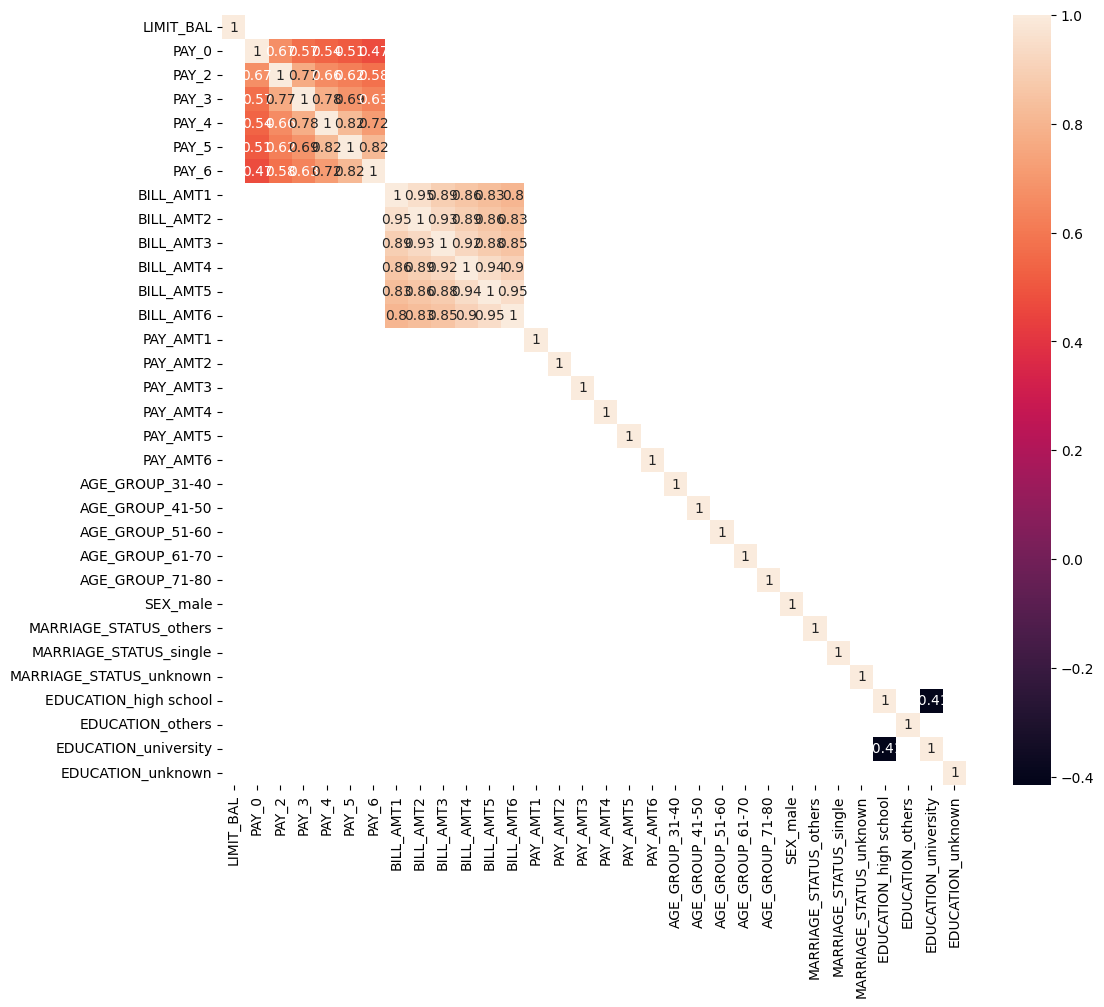

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr()[(X.corr()>0.4) | (X.corr()<(-0.4))], fmt = '.2g', annot = True)

As the highest correlation is between the features related to the bill statement, we will not drop them as its natural for financial data and we could lose important information

Now the numeric variables will be standarized in order to make the model independent of differences in value scales

In [25]:
numeric_features = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]

In [26]:
df[numeric_features] = df[numeric_features].apply(lambda x: (x-x.mean())/x.std())


Selecting variables based on Mutual Information scores


In [27]:
MI = mutual_info_classif(X, y)

In [28]:
mi_scores_sorted = sorted(list(zip(X.columns, MI)), key=lambda x: x[1], reverse=True)

for feature, mi_score in mi_scores_sorted:
    print(f"MI for {feature}: {mi_score}")

MI for PAY_0: 0.06201059465196468
MI for PAY_2: 0.04553330186529214
MI for PAY_3: 0.04017259562179887
MI for PAY_5: 0.033607271279474826
MI for PAY_4: 0.032775366086651436
MI for PAY_6: 0.026248147123494325
MI for LIMIT_BAL: 0.015300524639529023
MI for MARRIAGE_STATUS_single: 0.006447760914100709
MI for PAY_AMT4: 0.004133748880142729
MI for SEX_male: 0.003997836283694545
MI for AGE_GROUP_41-50: 0.0024537059596183575
MI for MARRIAGE_STATUS_unknown: 0.0019373254285333097
MI for BILL_AMT4: 0.0019102747927843833
MI for MARRIAGE_STATUS_others: 0.0017477664472895782
MI for BILL_AMT3: 0.0017445988761124465
MI for AGE_GROUP_71-80: 0.0016356072257552867
MI for AGE_GROUP_51-60: 0.0015519684888916085
MI for BILL_AMT2: 0.001308339669404468
MI for EDUCATION_university: 0.0009438190248425293
MI for PAY_AMT3: 0.0006568675806042368
MI for PAY_AMT5: 0.0006353955315772097
MI for EDUCATION_unknown: 0.0006133538489037083
MI for PAY_AMT1: 0.00034110839518008973
MI for EDUCATION_others: 0.000194375293965709

In [29]:
feature, mi_value = zip(*mi_scores_sorted)

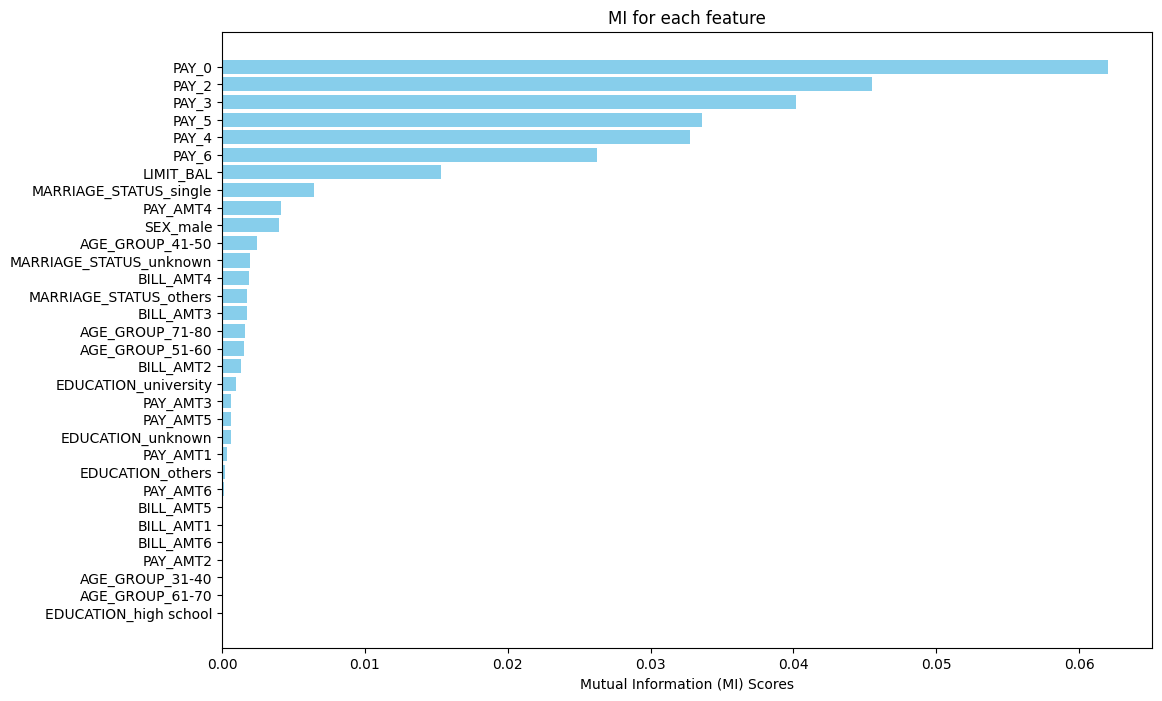

In [30]:
plt.figure(figsize=(12, 8))
plt.barh(feature, mi_value, color='skyblue')
plt.xlabel('Mutual Information (MI) Scores')
plt.title('MI for each feature')
plt.gca().invert_yaxis()  
plt.show()

I choose variables that have MI score above 0.001

In [31]:
selected_cols = []
treshold = 0.001
for col, mi_score in mi_scores_sorted:
    if mi_score > treshold:
        selected_cols.append(col)
X = df[selected_cols]

# Model Selection and Evaluation

Dividing the dataset into training and testing in 75/25 ratio, with stratify option that ensure the split maintains the same class distribution in bith datasets as the original dataset.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.25, random_state=1997)

We will test performance of 3 models:

- Logistic Regression
- Random Forest
- XGBoost

# Logistic Regression

- Setting the parameters grid
- Setting GridSearchCV
- Displaying best performing parameters

In [33]:
params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 2, 3],
    'tol': [0.001, 0.0001]
}

In [34]:
lr = LogisticRegression(solver= 'liblinear')
gs_lr = GridSearchCV(lr, params_lr, cv=5, return_train_score=True)
gs_lr.fit(X_train, y_train)
best_params_lr = gs_lr.best_params_
best_score_lr = gs_lr.best_score_
print(f'Best parameters for Logistic Regression: {best_params_lr}')
print(f'Best mean CV Score for Logistic Regression: {best_score_lr}')

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'tol': 0.001}
Best mean CV Score for Logistic Regression: 0.8109333333333334


# Random Forest 

- Setting the parameters grid
- Setting GridSearchCV
- Displaying best performing parameters

In [35]:
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4, 5]
}

In [36]:
rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, params_rf, cv=5, return_train_score=True)
gs_rf.fit(X_train, y_train)
best_params_rf = gs_rf.best_params_
best_score_rf = gs_rf.best_score_
print(f'Best parameters for Random Forest: {best_params_rf}')
print(f'Best mean CV Score for Random Forest: {best_score_rf}')

Best parameters for Random Forest: {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 50}
Best mean CV Score for Random Forest: 0.8231555555555555


# XGBoost

- Setting the parameters grid
- Setting GridSearchCV
- Displaying best performing parameters

In [37]:
params_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [38]:
xgb = XGBClassifier()
gs_xgb = GridSearchCV(xgb, params_xgb, cv=5, return_train_score=True)
gs_xgb.fit(X_train, y_train)
best_params_xgb = gs_xgb.best_params_
best_score_xgb = gs_xgb.best_score_
print(f'Best parameters for XGBoost: {best_params_xgb}')
print(f'Best mean CV Score for XGBoost: {best_score_xgb}')

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Best mean CV Score for XGBoost: 0.8232444444444444


From models that were tested Random Forest and XGBoost did the best job. The difference between these two models is very low, but in comparison to XGBoost, RandomForest is often less computationally demanding and faster in terms of training time. Taking this into consideration - final model used in this case will be Random Forest

- Fitting best model
- Creating prediction on test set
- Printing metrics for evaluation

In [39]:
model_rf = RandomForestClassifier(n_estimators= 50, max_depth= 8, min_samples_split= 5)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Classification Report:\n {class_report}')
print(f'\n Confusion Matrix:\n {conf_matrix}')

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      5841
           1       0.64      0.35      0.46      1659

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500


 Confusion Matrix:
 [[5515  326]
 [1072  587]]


Our models overall recall is 0.81 which is good, however the overall recall provides a weighted average that considers both classes, so in this scenario its dominated by the majority class (actual 0). 
The low recall for class 1 suggests that the model needs further improvement in identifying positive cases